**Deep learning Regression Model to predict Molecular Properties for Drug Discovery**

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
# Step 2: Load Dataset
df = pd.read_csv("/content/delaney-processed.csv")

# Preview dataset
print(df.head())
print(df.info())


  Compound ID  ESOL predicted log solubility in mols per litre  \
0   Amigdalin                                           -0.974   
1    Fenfuram                                           -2.885   
2      citral                                           -2.579   
3      Picene                                           -6.618   
4   Thiophene                                           -2.232   

   Minimum Degree  Molecular Weight  Number of H-Bond Donors  Number of Rings  \
0               1           457.432                        7                3   
1               1           201.225                        1                2   
2               1           152.237                        0                0   
3               2           278.354                        0                5   
4               2            84.143                        0                1   

   Number of Rotatable Bonds  Polar Surface Area  \
0                          7              202.32   
1           

In [3]:
df.describe()
df.isnull().sum()

,0
Compound ID,0
ESOL predicted log solubility in mols per litre,0
Minimum Degree,0
Molecular Weight,0
Number of H-Bond Donors,0
Number of Rings,0
Number of Rotatable Bonds,0
Polar Surface Area,0
measured log solubility in mols per litre,0
smiles,0


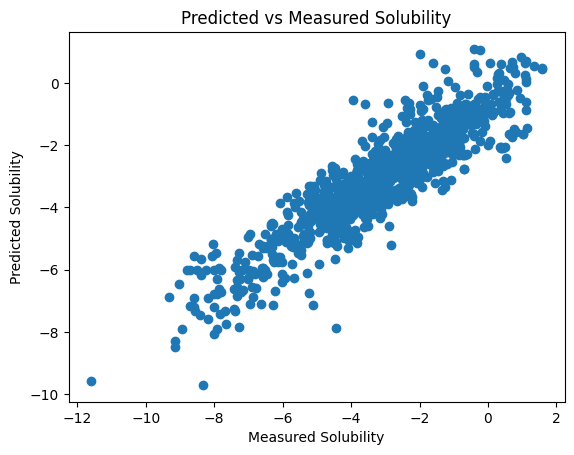

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df["measured log solubility in mols per litre"],
            df["ESOL predicted log solubility in mols per litre"])
plt.xlabel("Measured Solubility")
plt.ylabel("Predicted Solubility")
plt.title("Predicted vs Measured Solubility")
plt.show()


<Axes: >

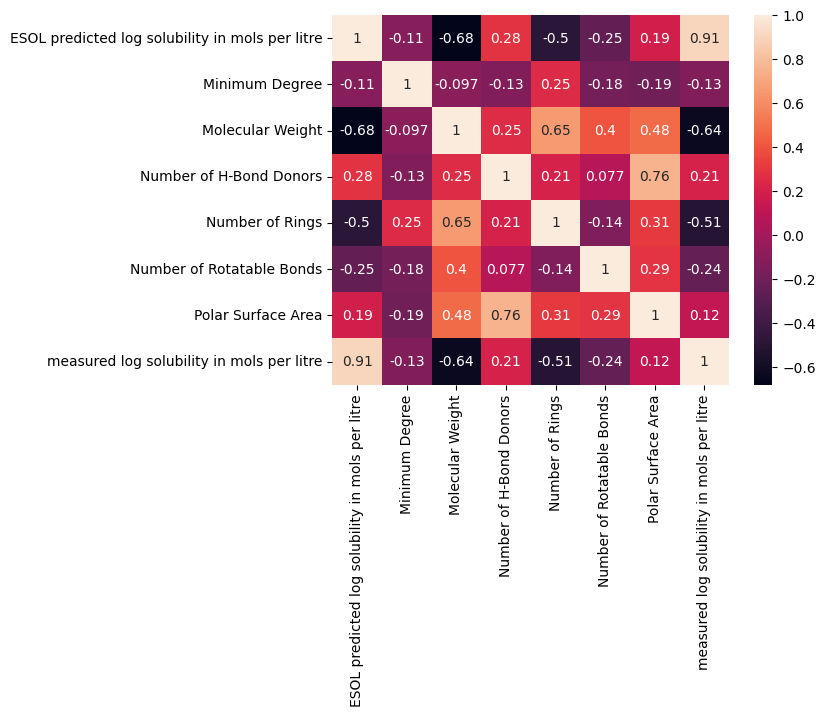

In [5]:
import seaborn as sns

# Drop non-numerical columns before calculating correlation
numerical_df = df.drop(['Compound ID', 'smiles'], axis=1)

sns.heatmap(numerical_df.corr(), annot=True)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Select features (independent variables)
X = df[['Minimum Degree', 'Molecular Weight', 'Number of H-Bond Donors',
        'Number of Rings', 'Number of Rotatable Bonds', 'Polar Surface Area']]

# Target variable
y = df['measured log solubility in mols per litre']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Scaling (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Step 5: Build Deep Learning Model
model = Sequential([
    Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')   # Regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,009 (168.00 KB)

 Trainable params: 43,009 (168.00 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Step 6: Train Model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=95,
    verbose=1
)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 11.3701 - mae: 2.8175 - val_loss: 5.9114 - val_mae: 1.9251
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.0563 - mae: 1.7807 - val_loss: 3.3934 - val_mae: 1.3065
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.6582 - mae: 1.3829 - val_loss: 2.2633 - val_mae: 1.1724
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.4449 - mae: 1.2074 - val_loss: 2.1775 - val_mae: 1.1287
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.9686 - mae: 1.1079 - val_loss: 2.0513 - val_mae: 1.0956
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.8514 - mae: 1.0928 - val_loss: 1.8671 - val_mae: 1.0461
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.6787 - mae: 1.0245 - val_loss: 1.6773 - val_mae: 0.9662
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.7211 - mae: 1.0414 - val_loss: 1.5795 - val_mae: 0.9420
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - l

In [10]:
# Step 7: Evaluate Model
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
RMSE: 0.892
R²: 0.832


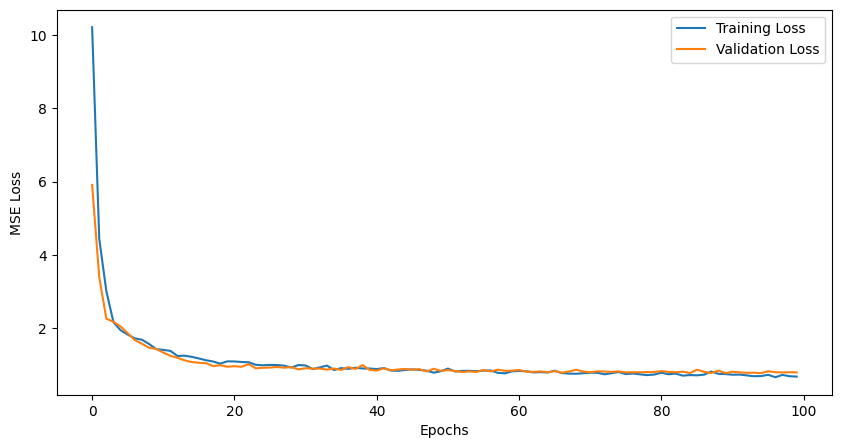

In [11]:
# Step 8: Plot Training Performance
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [12]:
!pip install keras-tuner --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.8 MB/s eta 0:00:00


In [13]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()

    # First hidden layer
    model.add(Dense(
        units=hp.Int('units_1', min_value=64, max_value=512, step=64),
        activation=hp.Choice('activation_1', values=['relu', 'tanh']),
        input_dim=X_train_scaled.shape[1]
    ))

    # Dropout
    model.add(Dropout(hp.Float('dropout_1', 0.1, 0.5, step=0.1)))

    # Second hidden layer
    model.add(Dense(
        units=hp.Int('units_2', min_value=32, max_value=256, step=32),
        activation=hp.Choice('activation_2', values=['relu', 'tanh'])
    ))

    model.add(Dropout(hp.Float('dropout_2', 0.1, 0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='linear'))

    # Compile
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
        ),
        loss='mse',
        metrics=['mae']
    )
    return model

In [14]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,   # try 10 different combinations
    executions_per_trial=2,
    directory='mlogp_tuning',
    project_name='drug_discovery'
)

tuner.search(X_train_scaled, y_train,
             validation_data=(X_test_scaled, y_test),
             epochs=50,
             batch_size=32,
             verbose=1)


Trial 10 Complete [00h 00m 37s]
val_loss: 0.7952653169631958

Best val_loss So Far: 0.7101916968822479
Total elapsed time: 00h 06m 09s


In [15]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]

print("Best hyperparameters:", best_hyperparameters.values)

# Evaluate best model
y_pred_best = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_best)

print(f"Best Model RMSE: {rmse:.3f}")
print(f"Best Model R²: {r2:.3f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best hyperparameters: {'units_1': 192, 'activation_1': 'relu', 'dropout_1': 0.1, 'units_2': 192, 'activation_2': 'tanh', 'dropout_2': 0.2, 'learning_rate': 0.0028182874967211252}
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Best Model RMSE: 0.836
Best Model R²: 0.852


In [16]:
# Get the results summary
tuner.results_summary()

# Extract trials and validation losses
import pandas as pd

trials = tuner.oracle.get_best_trials(num_trials=10)
results = []

for t in trials:
    results.append({
        "trial_id": t.trial_id,
        "val_loss": t.metrics.get_last_value("val_loss"),
        **t.hyperparameters.values
    })

results_df = pd.DataFrame(results)
print(results_df)

Results summary
Results in mlogp_tuning/drug_discovery
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 03 summary
Hyperparameters:
units_1: 192
activation_1: relu
dropout_1: 0.1
units_2: 192
activation_2: tanh
dropout_2: 0.2
learning_rate: 0.0028182874967211252
Score: 0.7101916968822479

Trial 05 summary
Hyperparameters:
units_1: 320
activation_1: relu
dropout_1: 0.2
units_2: 96
activation_2: tanh
dropout_2: 0.2
learning_rate: 0.007741811088364651
Score: 0.7467049360275269

Trial 08 summary
Hyperparameters:
units_1: 384
activation_1: relu
dropout_1: 0.1
units_2: 192
activation_2: relu
dropout_2: 0.5
learning_rate: 0.002788040263541953
Score: 0.775240033864975

Trial 09 summary
Hyperparameters:
units_1: 384
activation_1: relu
dropout_1: 0.30000000000000004
units_2: 160
activation_2: relu
dropout_2: 0.30000000000000004
learning_rate: 0.0012443919004332027
Score: 0.7952653169631958

Trial 02 summary
Hyperparameters:
units_1: 384
activation_1: tanh
dropout_1: 0.1
